# BL40A2030 Wireless Communication Networks

## Week 5: Wireless networks - Scaling laws, empirical interference distribution and outage probability

## Author: Pedro Nardelli

### References 

#### Markdown syntax for writing in the notebook

[Markdown syntax](https://help.github.com/articles/basic-writing-and-formatting-syntax/)

#### Library for numerical calculation in Python

[Numpy](http://www.numpy.org/)

#### Statistical functions

[scipy.stats](Statistical functions)

#### Spatial manipulation in Scipy

[scipy.spatial](https://docs.scipy.org/doc/scipy-0.14.0/reference/spatial.html)

#### Plot in Python

[Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings

warnings.filterwarnings('ignore')

# Part I

## Plotting the scaling laws

- What happend with different networks when the number of nodes grow bigger and bigger?

### Transport capacity bits-meter per second

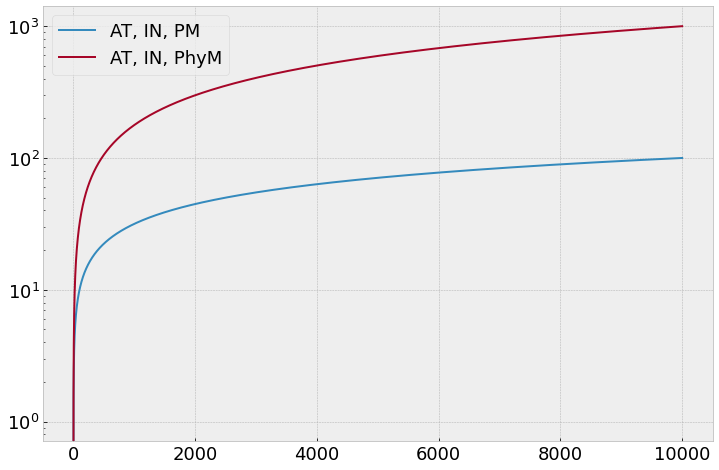

In [2]:
n = np.arange(0,10000)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12, 8))
# Transport capacity with arbitrary topology, immobile node and protocol model [5] (eq. 8)
TpC_AN_IN_PM = np.sqrt(n)
plt.semilogy(n,TpC_AN_IN_PM, label = 'AT, IN, PM')
# Transport capacity with arbitrary topology, immobile node and physical model [5] (eq. 10) with path-loss exponent alpha 
a=4
TpC_AN_IN_PhyM = n**((a-1)/a)
plt.semilogy(n,TpC_AN_IN_PhyM, label = 'AT, IN, PhyM')
plt.legend()
plt.show()

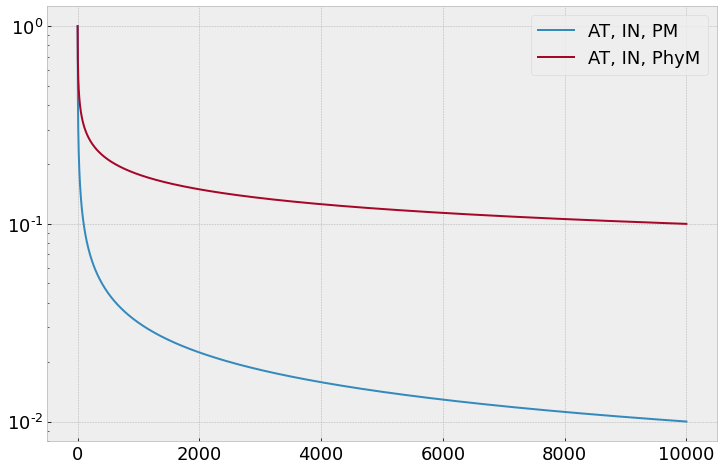

In [3]:
##Transport capacity per node
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12, 8))
TpC_AN_IN_PM_pernode = 1/np.sqrt(n)
plt.semilogy(n,TpC_AN_IN_PM_pernode, label = 'AT, IN, PM')
##
a=4
TpC_AN_IN_PhyM = 1/n**(1/a)
plt.semilogy(n,TpC_AN_IN_PhyM, label = 'AT, IN, PhyM')
plt.legend()
plt.show()

# Part II

## Interference in a snapshot of 2-D Poisson Point Process

- Path-loss exponent: $\alpha$
- Interference: $\sum d_i^{-\alpha}$, where $i$ are the interferering nodes.

### Distances in a snapshot

number of points: 103


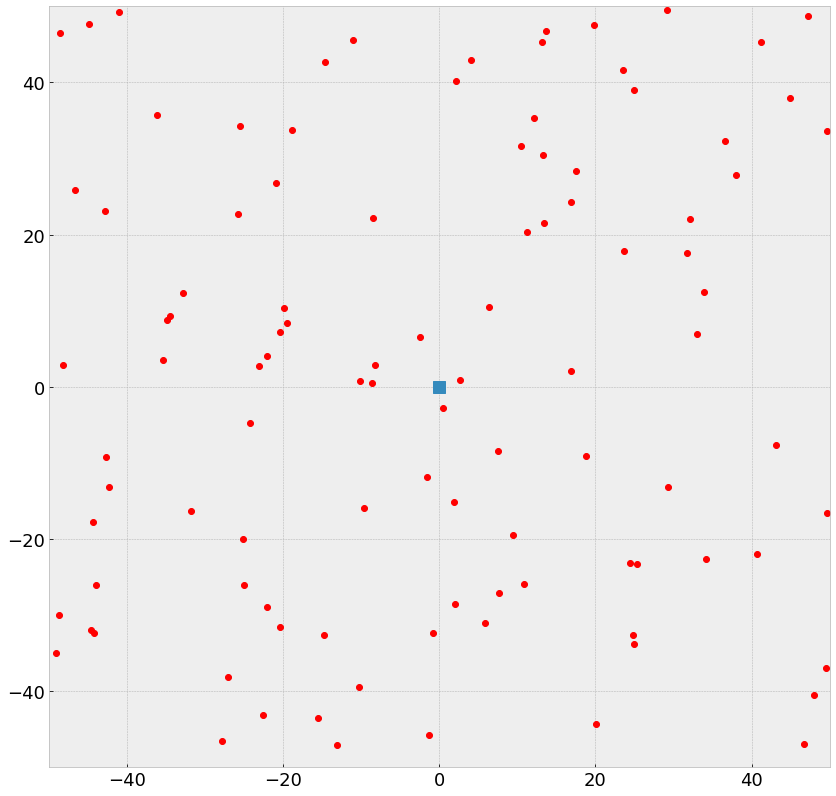

In [4]:
#Network size (square)
L = 100
#Number of nodes
mean_poisson = 100
n = np.random.poisson(mean_poisson)
print('number of points:', n)
#
#Uniform distribution in x
position_x_realization = np.random.uniform(-L/2,L/2,n)

#Uniform distribution in y
position_y_realization = np.random.uniform(-L/2,L/2,n)

# Figure
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14, 14))
plt.plot(position_x_realization, position_y_realization, 'r o')
plt.plot(0, 0, 's',markersize=12)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.show()

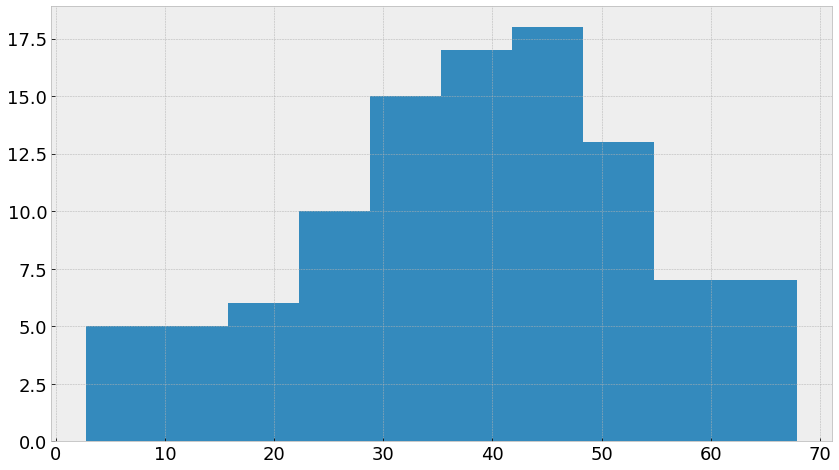

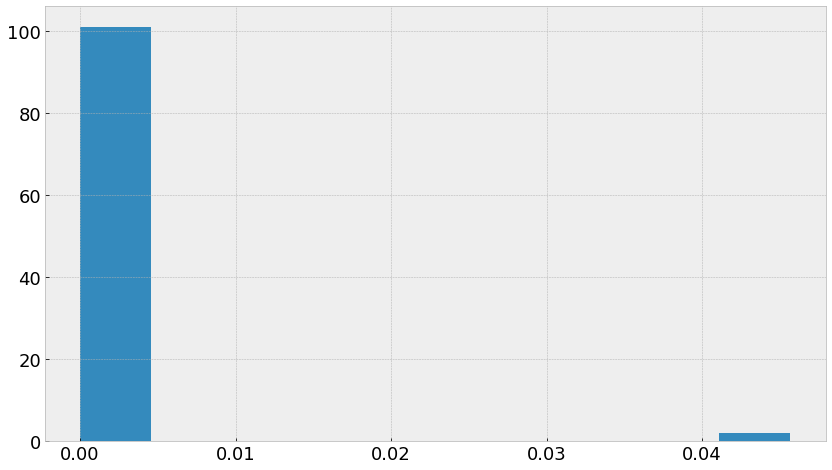

Interference: 0.10142502266971487


In [5]:
#Path-loss exponent
alpha = 3
#Manipulating arrays to compute distances
position_x_realization_t = np.transpose(position_x_realization) 
position_y_realization_t = np.transpose(position_y_realization) 
position_final = []
position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
#position_final
###############
#The distance to the rx1 (0,0)
###
distance_rx = []
distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
interference_i = []
interference_i = [distance_rx[i]**(-alpha) for i in range(n)]
interference = np.sum(interference_i)
#The distance to the rx2 (L/3, -L/4)
###Plot
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.hist(distance_rx)
plt.show()
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.hist(interference_i)
plt.show()
print("Interference:", interference)

## Let's compute the distribution of the interference over many spatial realizations (trials)

- It requires many loops.... (Monte Carlo)
- Problems when $d_i<1$ ?

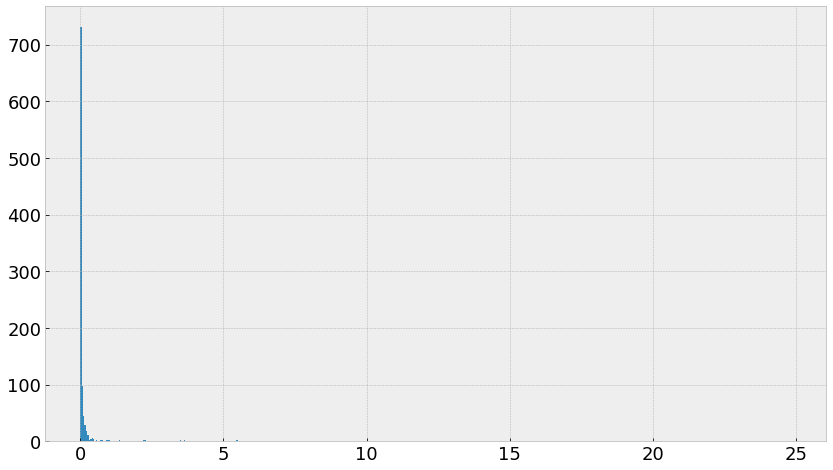

In [6]:
#Number of trials
trials = 1000
#Network size (square)
L = 100
mean_poisson = 100
#Path-loss exponent
alpha = 3
interference = np.zeros(trials)
for j in range(trials):   
    #Number of nodes
    n = np.random.poisson(mean_poisson)
    #
    #Uniform distribution in x
    position_x_realization = np.random.uniform(-L/2,L/2,n)

    #Uniform distribution in y
    position_y_realization = np.random.uniform(-L/2,L/2,n)
    ##
    #Manipulating arrays to compute distances
    position_x_realization_t = np.transpose(position_x_realization) 
    position_y_realization_t = np.transpose(position_y_realization) 
    position_final = []
    position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
    #position_final
    ###############
    #The distance to the rx1 (0,0)
    ###
    distance_rx = []
    distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
    interference_i = []
    interference_i = [distance_rx[i]**(-alpha) for i in range(n)]
    interference[j] = np.sum(interference_i)

###Plot
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.hist(interference,bins=500)
plt.show()

### Modified path-loss model 1:
- if $d_i < 1$, then $P_i = 1$
- otherwise: $P_i = d_i^{-\alpha}$

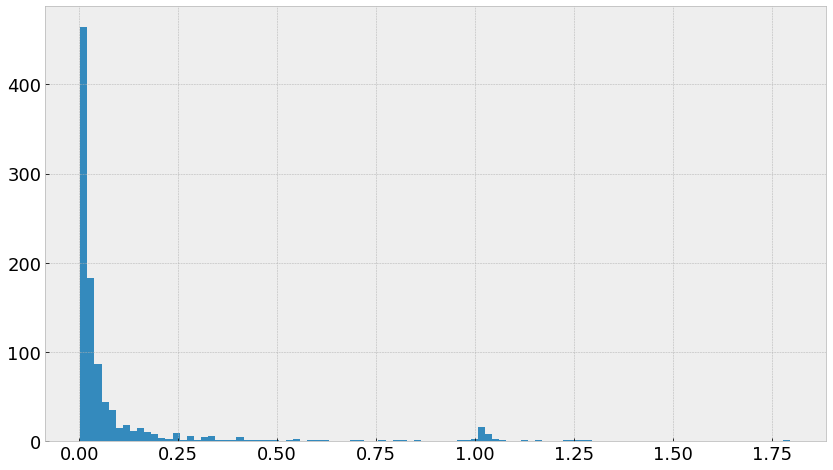

In [7]:
#Number of trials
trials = 1000
#Network size (square)
L = 100
mean_poisson = 100
#Path-loss exponent
alpha = 3
interference = np.zeros(trials)
for j in range(trials):   
    #Number of nodes
    n = np.random.poisson(mean_poisson)
    #
    #Uniform distribution in x
    position_x_realization = np.random.uniform(-L/2,L/2,n)

    #Uniform distribution in y
    position_y_realization = np.random.uniform(-L/2,L/2,n)
    ##
    #Manipulating arrays to compute distances
    position_x_realization_t = np.transpose(position_x_realization) 
    position_y_realization_t = np.transpose(position_y_realization) 
    position_final = []
    position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
    #position_final
    ###############
    #The distance to the rx1 (0,0)
    ###
    distance_rx = []
    distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
    interference_i = np.zeros(n)
    for i in range(n):
        if distance_rx[i] < 1: 
            interference_i[i] = 1
        else:        
            interference_i[i] = distance_rx[i]**(-alpha)
    interference[j] = np.sum(interference_i)

###Plot
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.hist(interference,bins = 100)
plt.show()

### Modified path-loss model 2:
- $P_i = (1+d_i)^{-\alpha}$

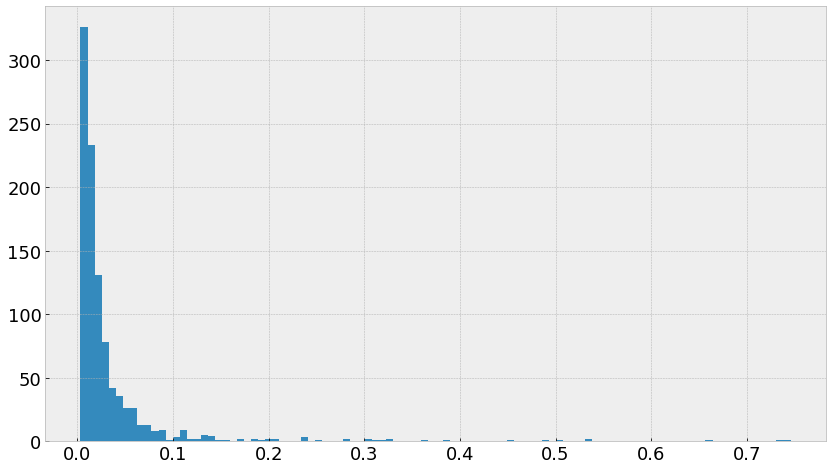

In [8]:
#Number of trials
trials = 1000
#Network size (square)
L = 100
mean_poisson = 100
#Path-loss exponent
alpha = 3
interference = np.zeros(trials)
for j in range(trials):   
    #Number of nodes
    n = np.random.poisson(mean_poisson)
    #
    #Uniform distribution in x
    position_x_realization = np.random.uniform(-L/2,L/2,n)

    #Uniform distribution in y
    position_y_realization = np.random.uniform(-L/2,L/2,n)
    ##
    #Manipulating arrays to compute distances
    position_x_realization_t = np.transpose(position_x_realization) 
    position_y_realization_t = np.transpose(position_y_realization) 
    position_final = []
    position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
    #position_final
    ###############
    #The distance to the rx1 (0,0)
    ###
    distance_rx = []
    distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
    interference_i = []
    interference_i = [(1+distance_rx[i])**(-alpha) for i in range(n)]
    interference[j] = np.sum(interference_i)

###Plot
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.hist(interference, bins = 100)
plt.show()

## Success probability based on Power capture model

- Receiver located at the origin whose Transmitter is located at a distance $d_0$
- Using standard path loss.
- Signal: $S = d_0^{-\alpha}$
- Interference: $I = \sum d_i^{-\alpha}$
- Success: $\mathrm{SIR} > \beta$, otherwise outage

No need to use modified versions of path-loss if $d_0 \geq 1$ and $\beta \geq 1$ (any interferer closer to the RX0 than the TX0 will cause an outage event). Note that we are not intereted in the distribution of the interference, but in the probability that the SIR is greater than a threshold.

number of points: 92


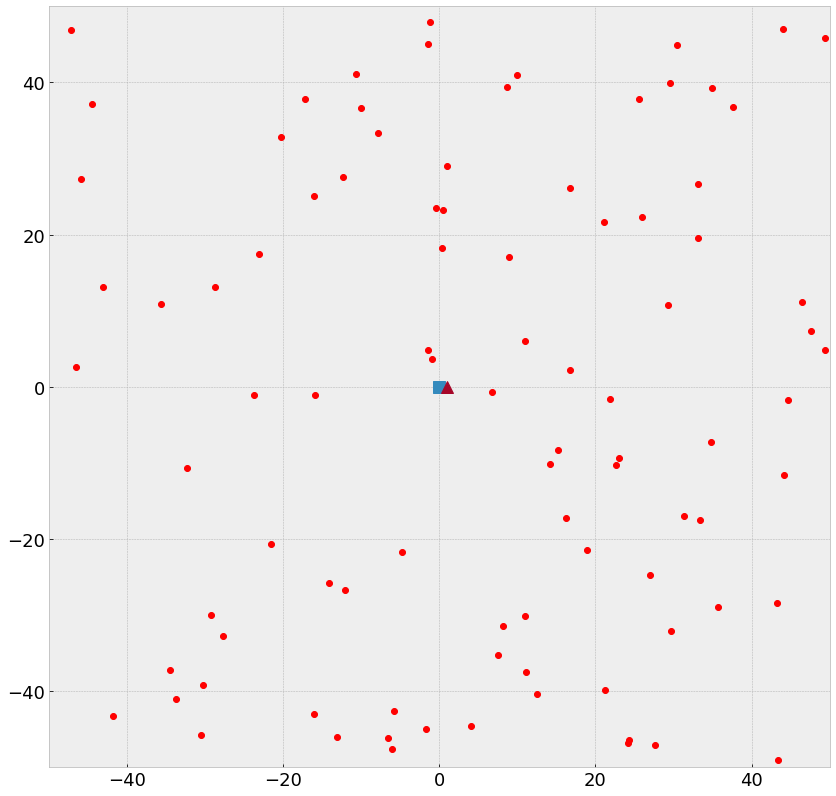

In [9]:
#Network size (square)
L = 100
###
d=1
#Number of nodes
mean_poisson = 100
n = np.random.poisson(mean_poisson)
print('number of points:', n)
#
#Uniform distribution in x
position_x_realization = np.random.uniform(-L/2,L/2,n)

#Uniform distribution in y
position_y_realization = np.random.uniform(-L/2,L/2,n)

# Figure
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14, 14))
plt.plot(position_x_realization, position_y_realization, 'r o')
plt.plot(0, 0, 's',markersize=12)
plt.plot(d, 0, '^',markersize=12)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.show()

In [10]:
#Number of trials
trials = 1000
#Network size (square)
L = 10
mean_poisson = 10
#
d = 1
beta = 1 
#Path-loss exponent
alpha = 4
interference = np.zeros(trials)
success = 0
for j in range(trials):   
    #Number of nodes
    n = np.random.poisson(mean_poisson)
    #
    #Uniform distribution in x
    position_x_realization = np.random.uniform(-L/2,L/2,n)

    #Uniform distribution in y
    position_y_realization = np.random.uniform(-L/2,L/2,n)
    ##
    #Manipulating arrays to compute distances
    position_x_realization_t = np.transpose(position_x_realization) 
    position_y_realization_t = np.transpose(position_y_realization) 
    position_final = []
    position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
    #position_final
    ###############
    #The distance to the rx1 (0,0)
    ###
    distance_rx = []
    distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
    interference_i = []
    interference_i = [distance_rx[i]**(-alpha) for i in range(n)]
    if np.sum(interference_i) * beta < d**(-alpha): 
        success = success + 1
###Success probability
print("Success probability:", success/trials)

Success probability: 0.668


## Let's plot the success probability as a function of the expected number of interferers

- Defining a function that returns the probability of success using the Power Capture Model

In [11]:
def suc_prob(d,beta,alpha,L,mean_poisson,trials):
    interference = np.zeros(trials)
    success = 0
    for j in range(trials):   
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization) 
        position_y_realization_t = np.transpose(position_y_realization) 
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [distance_rx[i]**(-alpha) for i in range(n)]
        if np.sum(interference_i) * beta < d**(-alpha): 
            success = success + 1
    return success/trials

In [12]:
suc_prob(d=1,beta=1,alpha=4,L=10,mean_poisson=10,trials=1000)

0.675

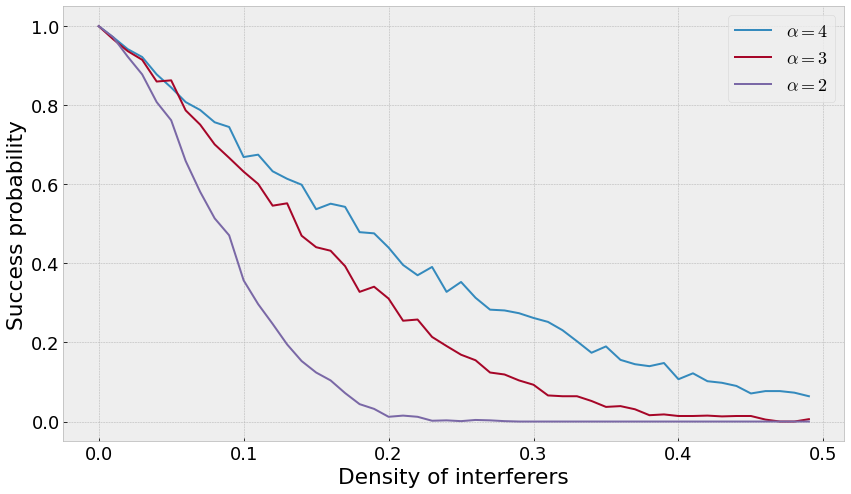

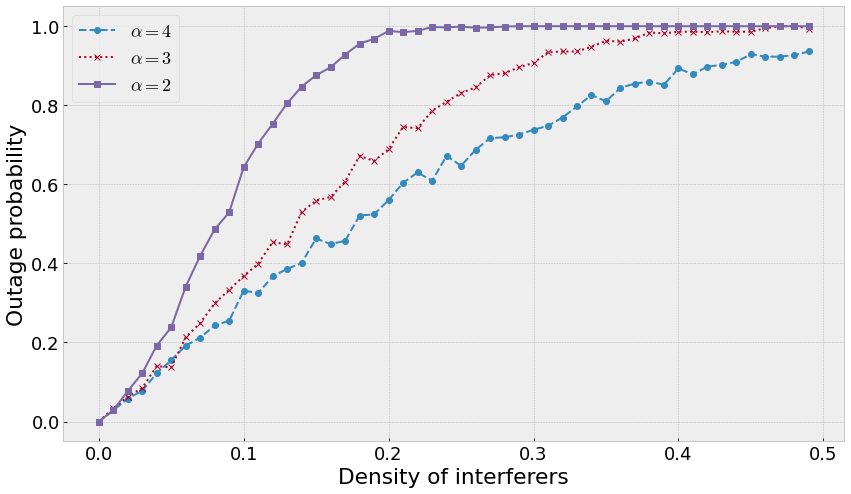

In [13]:
# Density of interferers as mean_poisson / network area
density = []
density = [i/L**2 for i in range(50)]
###Path-loss
n_trials = 1000
#alpha=2
suc_a2 = []
suc_a2 = [suc_prob(d=1,beta=1,alpha=2,L=10,mean_poisson= i,trials = n_trials) for i in range(50)]
#alpha=3
suc_a3 = []
suc_a3 = [suc_prob(d=1,beta=1,alpha=3,L=10,mean_poisson= i,trials =n_trials) for i in range(50)]
#alpha=4
suc_a4 = []
suc_a4 = [suc_prob(d=1,beta=1,alpha=4,L=10,mean_poisson= i,trials =n_trials) for i in range(50)]


plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(density, suc_a4,label=r'$\alpha=4$')
plt.plot(density, suc_a3,label=r'$\alpha=3$')
plt.plot(density, suc_a2,label=r'$\alpha=2$')
plt.xlabel("Density of interferers")
plt.ylabel("Success probability")
plt.legend()
plt.show()

###

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(density,  np.ones(50) - suc_a4,'o--' ,label=r'$\alpha=4$')
plt.plot(density, np.ones(50) - suc_a3, 'x:' , label=r'$\alpha=3$')
plt.plot(density, np.ones(50) - suc_a2,'s-' , label=r'$\alpha=2$')
plt.xlabel("Density of interferers")
plt.ylabel("Outage probability")
plt.legend()
plt.show()

### Try with other values of $\beta$ and $d$